# Create data

In [1]:
import random
import torch
from torch import nn, optim
import math
from IPython import display

In [2]:
from plot_lib import plot_data, plot_model, set_default

In [3]:
set_default()

In [4]:
device = torch.device('cuda:0')

In [5]:
seed = 12345
random.seed(seed)
torch.manual_seed(seed)
N = 1000 # num samples per class
D = 2    # dimensions
C = 3    # num classes
H = 100  # num hidden units

In [6]:
X = torch.zeros(N * C, D).to(device)
y = torch.zeros(N * C, dtype=torch.long).to(device)
for c in range(C):
    index = 0
    t = torch.linspace(0, 1, N)
    
    # inner_var is for the formula insdie sin() and cos(), e.g., sin(inner_var)
    inner_var = torch.linspace(
        (2 * math.pi / C) * (c),
        (2 * math.pi / C) * (c + 2),
        N
    ) + torch.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[index] * torch.FloatTensor(
            (math.sin(inner_var[index]), math.cos(inner_var[index]))
        )
        y[ix] = c
        index += 1
        
print('Shapes:')
print('X:', tuple(X.size()))
print('y:', tuple(y.size()))

Shapes:
X: (3000, 2)
y: (3000,)


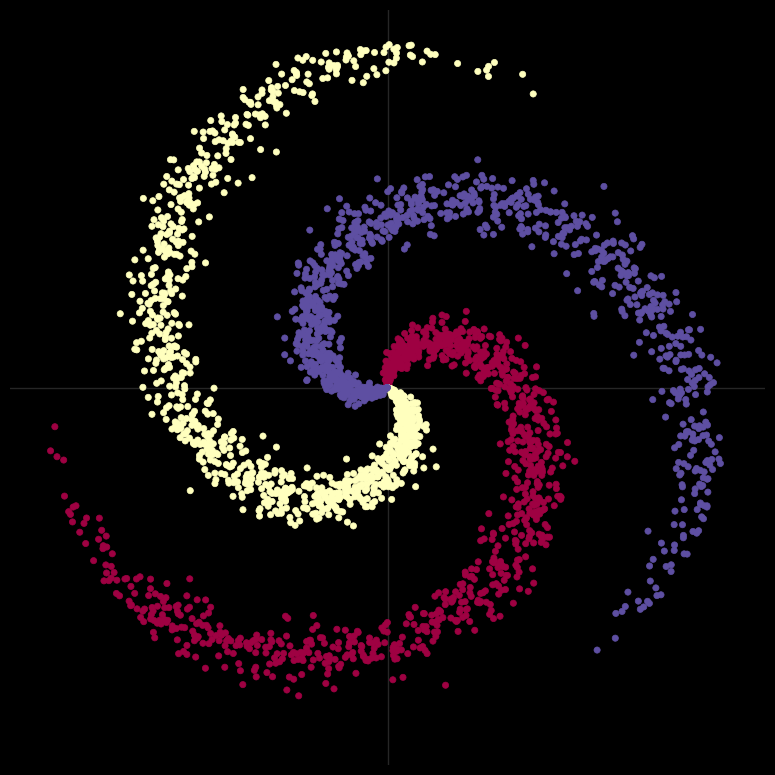

In [7]:
plot_data(X, y)

# Linear model

In [8]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [11]:
# note that yeah, this could be a single matrix
model = nn.Sequential(
    nn.Linear(D, H),
    nn.Linear(H, C)
)
model.to(device)

# use cross entropy loss for classifcation
criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

# training
for t in range(1000):
    # feed-forward
    y_pred = model(X)
    
    # compute loss and accuracy metric
    loss = criterion(y_pred, y)
    score, predicted = torch.max(y_pred, 1)     # this returns (max_value, argmax)
    acc = (y == predicted).sum().float() / len(y)
    print(f'[Epoch] {t:d}, [Loss]: {loss.item():.5f}, [Accuracy]: {acc:.3f}')
    display.clear_output(wait=True)
    
    # zero gradients before running backward pass
    optimizer.zero_grad()
    
    # backward pass
    loss.backward()
    
    # update params
    optimizer.step()

[Epoch] 999, [Loss]: 0.87348, [Accuracy]: 0.509


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): Linear(in_features=100, out_features=3, bias=True)
)


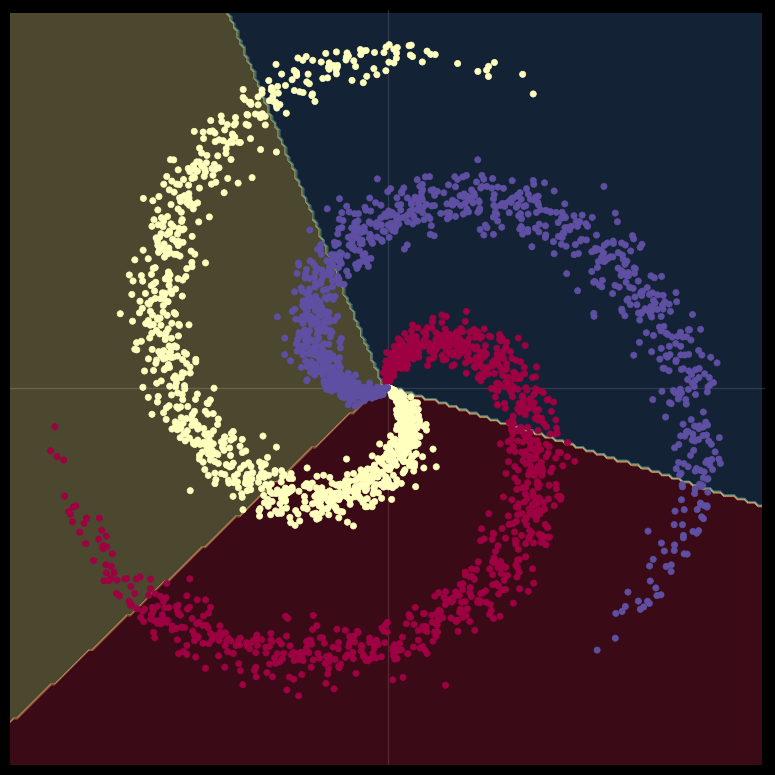

In [12]:
# plot trained model
print(model)
plot_model(X, y, model)

# Two-layered network

In [13]:
learning_rate = 1e-3
lambda_l2 = 1e-5

In [15]:
# note inclusion of non-linearity

model = nn.Sequential(
    nn.Linear(D, H),
    nn.ReLU(),
    nn.Linear(H, C)
)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()

# use Adam here
optimizer = torch.optim.Adam(
    model.parameters(), 
    lr=learning_rate,
    weight_decay=lambda_l2
)

for t in range(1000):
    
    # forward
    y_pred = model(X)
    
    # calculate loss
    loss = criterion(y_pred, y)
    _, predicted = torch.max(y_pred, dim=1)
    acc = (y == predicted).sum().float() / len(y)
    print(f'[Epoch]: {t:d}, [Loss]: {loss.item():.5f}, [Accuracy]: {acc:.3f}')
    display.clear_output(wait=True)
    
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

[Epoch]: 999, [Loss]: 0.18379, [Accuracy]: 0.943


Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=3, bias=True)
)


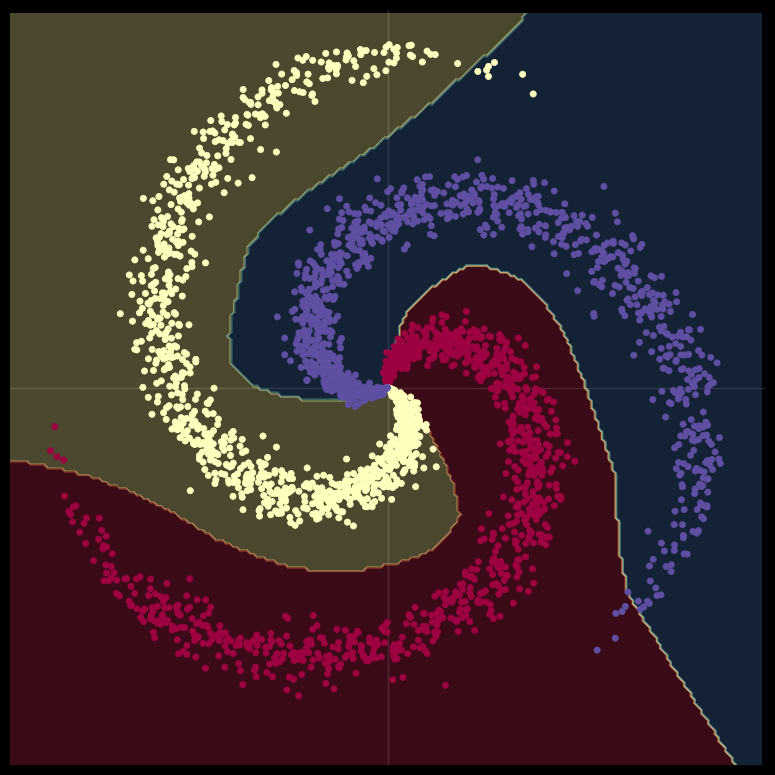

In [16]:
print(model)
plot_model(X, y, model)